# FESTIM meshes

FESTIM provides built-in support for creating 1D meshes without relying on external libraries like DOLFINx. These meshes are lightweight, easy to define, and ideal for problems where one-dimensional modelling is sufficient, such as studying hydrogen diffusion through walls or coatings.

In this tutorial, we will explore how to create and use different types of 1D meshes in FESTIM, including:

- **Uniform meshes**, where elements are evenly spaced across the domain  
- **Non-uniform meshes**, which allow local refinement for better resolution near interfaces or boundaries  

These tools are particularly useful for rapid prototyping, simplified analysis, and cases where full 2D or 3D simulations are not necessary.

By the end of this tutorial, you’ll be able to create and customise 1D meshes directly in FESTIM and use them in a working simulation.

## Uniform 1D meshes

The `Mesh1D` class in FESTIM allows you to define 1D meshes by simply specifying the coordinates of the mesh vertices. This makes it easy to construct uniform or structured meshes over a given interval.

A **uniform mesh** is one where the spacing between points is constant. This type of mesh is ideal for problems where the physical properties or expected solution gradients are evenly distributed across the domain.

FESTIM accepts the vertex positions as a list of floats/integers or as a NumPy array. Here are two common ways to define a uniform mesh:

In [ ]:
import festim as F

simple_mesh = F.Mesh1D(vertices=[0, 1, 2, 3, 4, 5, 6, 7, 7.5])

print(simple_mesh.vertices)

An example mesh for a domain from $0$ to $7.0\times 10^{-6}$ with 50 cells defined using NumPy:

In [3]:
import numpy as np

mesh = F.Mesh1D(vertices=np.linspace(0, 7e-6, num=50))

print(mesh.vertices)

[0.00000000e+00 1.42857143e-07 2.85714286e-07 4.28571429e-07
 5.71428571e-07 7.14285714e-07 8.57142857e-07 1.00000000e-06
 1.14285714e-06 1.28571429e-06 1.42857143e-06 1.57142857e-06
 1.71428571e-06 1.85714286e-06 2.00000000e-06 2.14285714e-06
 2.28571429e-06 2.42857143e-06 2.57142857e-06 2.71428571e-06
 2.85714286e-06 3.00000000e-06 3.14285714e-06 3.28571429e-06
 3.42857143e-06 3.57142857e-06 3.71428571e-06 3.85714286e-06
 4.00000000e-06 4.14285714e-06 4.28571429e-06 4.42857143e-06
 4.57142857e-06 4.71428571e-06 4.85714286e-06 5.00000000e-06
 5.14285714e-06 5.28571429e-06 5.42857143e-06 5.57142857e-06
 5.71428571e-06 5.85714286e-06 6.00000000e-06 6.14285714e-06
 6.28571429e-06 6.42857143e-06 6.57142857e-06 6.71428571e-06
 6.85714286e-06 7.00000000e-06]


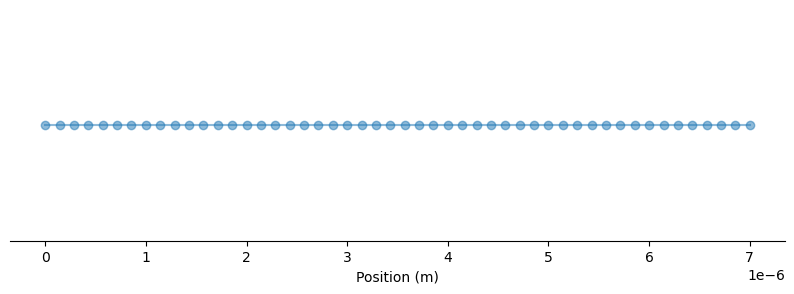

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(mesh.vertices, np.zeros_like(mesh.vertices), marker="o", color="tab:blue", alpha=0.5)
plt.xlabel("Position (m)")
plt.yticks([])
# remove spines
plt.gca().spines[['top', 'right', 'left']].set_visible(False)
plt.show()

```{note} Note
The list of vertex positions does **not** need to start at zero. The mesh can span any interval, such as $[1, 20]$ or $[-10^{-4}, 0]$, depending on the physical domain you're modelling.
```

In [5]:
mesh = F.Mesh1D(vertices=np.linspace(1, 20, num=40))

## Non-uniform 1D meshes

FESTIM also supports **non-uniform 1D meshes**, which are useful when you want to locally refine the mesh in specific regions of interest. For example, near boundaries, interfaces, or material layers where higher solution accuracy is needed.

To define a non-uniform mesh, you simply provide a list or array of vertices with **non-uniform spacing**. This gives you full control over mesh resolution across the domain.

In [ ]:

# Define a mesh with local refinement near the left and right ends
vertices = np.concatenate(
    [
        np.linspace(0, 1e-7, num=200),
        np.linspace(1e-7, 2e-6, num=1000),
        np.linspace(2e-6, 3e-6, num=200),
    ]
)

mesh = F.Mesh1D(vertices=vertices)

We can visualise how the mesh density varies along the domain by plotting a histogram of the vertex positions. This helps confirm that the mesh is finer in regions where local refinement was applied.

In the example below, we observe a higher concentration of vertices near $x = 0$ and $x = 3 \times 10^{-6}$ m, and a coarser spacing in the middle of the domain.

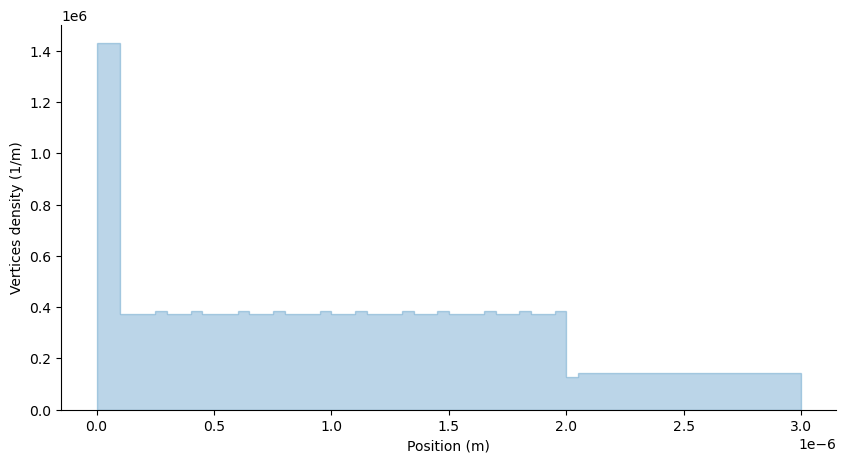

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(mesh.vertices, density=True, bins=60, alpha=0.3, edgecolor="tab:blue", histtype="stepfilled")
plt.xlabel("Position (m)")
plt.ylabel("Vertices density (1/m)")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In some applications, it’s useful to start with fine resolution and let cell sizes gradually grow, such as when modelling diffusion away from a surface.

This can be achieved by defining the mesh with geometrically increasing intervals"

In [8]:
vertices = np.geomspace(1e-7, 1e-3, num=500)

mesh = F.Mesh1D(vertices=vertices)

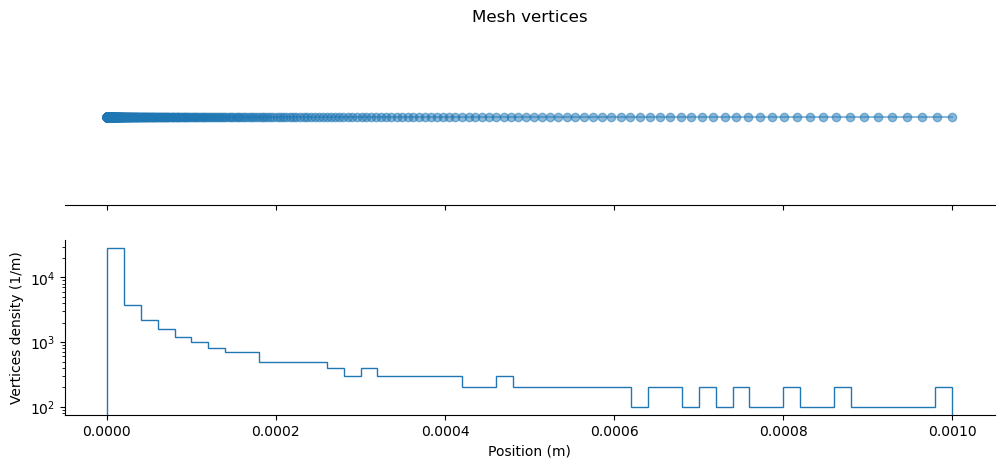

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(12, 5), sharex=True)

plt.sca(axs[0])
plt.title("Mesh vertices")
plt.plot(mesh.vertices, np.zeros_like(mesh.vertices), marker="o", color="tab:blue", alpha=0.5)

plt.yticks([])
plt.gca().spines[['top', 'right', 'left']].set_visible(False)

plt.sca(axs[1])
plt.hist(mesh.vertices, density=True, bins=50, edgecolor="tab:blue", histtype="step")
plt.xlabel("Position (m)")
plt.ylabel("Vertices density (1/m)")
plt.yscale("log")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

Below is an example where the cell sizes grow with a 10% rate, starting from an initial cell width of $ 10^{-7}$ m, until the total domain length reaches $10^{-3}$ m.

In [13]:
growth_rate = 1.1
initial_length = 1e-7
total_size = 1e-3
sizes = [initial_length]

while sum(sizes) < total_size:
    sizes.append(sizes[-1] * growth_rate)

# truncate the last size if it exceeds the target size
if sum(sizes) > total_size:
    sizes[-1] = total_size - sum(sizes[:-1])

vertices = np.cumsum(sizes)
mesh = F.Mesh1D(vertices=vertices)


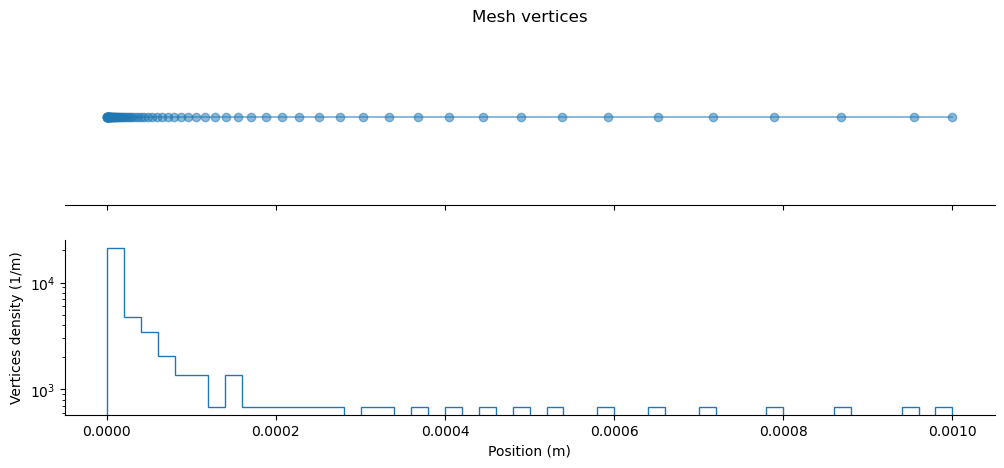

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(12, 5), sharex=True)

plt.sca(axs[0])
plt.title("Mesh vertices")
plt.plot(mesh.vertices, np.zeros_like(mesh.vertices), marker="o", color="tab:blue", alpha=0.5)
plt.gca().spines[['top', 'right', 'left']].set_visible(False)

plt.yticks([])

plt.sca(axs[1])
plt.hist(mesh.vertices, density=True, bins=50, edgecolor="tab:blue", histtype="step")
plt.xlabel("Position (m)")
plt.ylabel("Vertices density (1/m)")
plt.yscale("log")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

## Application to a FESTIM problem

See [](simple-simulation) tutorial for an example of a FESTIM problem with a 1D mesh.